In [161]:
#import the required libraries
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
import statsmodels.api as sm

from sklearn import linear_model

from statistics import StatisticsError


In [162]:
#importing the dataset
data=pd.read_csv("/content/1.01. Simple linear regression.csv")

In [163]:
#reading the first five columns of the data
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [164]:
#describe the data
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [165]:

y = data["GPA"] #dependent variable
 
x1 = data["SAT"] #independent variable

# Linear regression

Linear regression is an approach for modeling the relationship between two (simple linear regression) or more variables (multiple linear regression). In simple linear regression, one variable is considered the predictor or independent variable, while the other variable is viewed as the outcome or dependent variable.

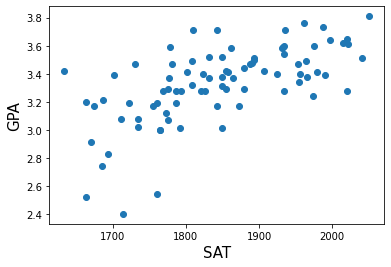

In [166]:
plt.scatter(x1,y) #scatter the plot 

#labelling the values

plt.xlabel("SAT", fontsize = 15)
 
plt.ylabel("GPA", fontsize = 15)

#plotting the graph
 
plt.show()

In the picture, you can see a linear relationship. That is, if the independent variable increases or decreases, the dependent variable will also increase or decrease.
Linear regression can be used to make simple predictions such as predicting exams scores based on the number of hours studied, the salary of an employee based on years of experience, and so on.

#Fitting the model

Now it’s time to fit the model. To explain to you what fitting a model means, consider the following generic equation used for simple linear regression.

In [167]:

X = sm.add_constant(x1) # Initializing a constant
results = sm.OLS(y, X).fit() # fitting the model
results.summary() #summary of the model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.20e-11
Time:                        03:46:41   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Plotting the regression

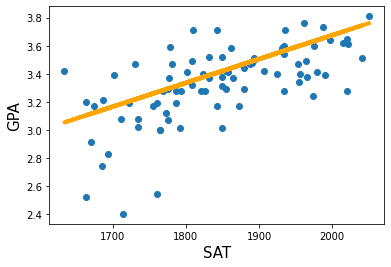

In [168]:
#LInear regression plot
plt.scatter(x1,y)

#y=ax+b

#const coef = 0.2750

#SAT coef = 0.0017
 
yt = 0.0017*x1 + 0.275
 
fig = plt.plot(x1,yt, lw=4, c="orange", label = "Regression Line")
 
plt.xlabel("SAT", fontsize = 15)
 
plt.ylabel("GPA", fontsize = 15)
 
plt.show()

Fitting the model means finding the optimal values of x and y, so we obtain a line that best fits the data points. A model that is well-fitted produces more accurate outcomes, so only after fitting the model, we can predict the target value using the predictors.
Now let’s fit a model using statsmodels. First, we add a constant before fitting a model (sklearn adds it by default) and then we fit the model using the .fit() method.

<Figure size 1152x720 with 0 Axes>

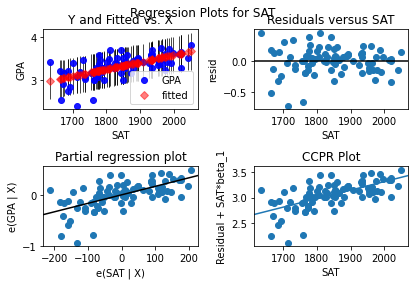

In [169]:
#define figure size 
fig = plt.figure(figsize=(16,10))

#produce residual plots
fig = sm.graphics.plot_regress_exog(results, 'SAT', fig=None)

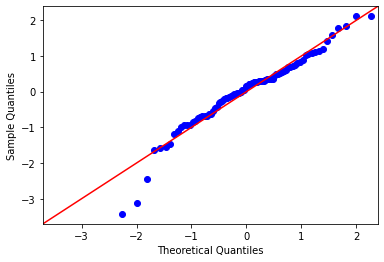

In [170]:
#define residuals
res = results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show() 

Now let’s fit a model using statsmodels. First, we add a constant before fitting a model (sklearn adds it by default) and then we fit the model using the .fit() method.

#Linear Regression with sklearn

In [171]:
#again read the same dependent and independent variables

y = data["GPA"] #dependent variable
 
x1 = data["SAT"] #independent variable

In [172]:
lm = linear_model.LinearRegression()
results=lm.fit(X, y) # fitting the model
lm.fit(X,y)

LinearRegression()

In [173]:
X = sm.add_constant(X) #adding the constant variable

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


“lm” stands for linear model and represents our fitted model.

#Predicting the model

In [174]:
lm.predict(X)[:5]

array([3.11288962, 3.03010522, 3.18905127, 3.06487466, 3.07812017])

In [175]:
lm.score(X, y) #Score of the model

0.40600391479679754

In [176]:
lm.coef_ #coefficient

array([0.        , 0.00165569])

In [177]:
lm.intercept_ #intercept

0.2750402996602799

In [178]:
#Calculate the mean square error
MSE = np.square(np.subtract(y,yt)).mean()
print(MSE)

0.05000143107142855
